In [58]:
import torch
import numpy as np
from torchvision import models
from custom_classes import Save_Output
import torch.nn as nn


In [59]:
model_old = models.alexnet(pretrained=True)

In [60]:
model_old.classifier[1] = nn.Linear(6,4096)
model_old.classifier[4] = nn.Linear(4096,1024)
model_old.classifier[6] = nn.Linear(1024,100)

In [61]:
model_old.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=6, out_features=4096, bias=True)
    

In [62]:
# import copy
# model_new = torch.nn.Sequential()
# layers = []
# temp = model_old.children()
# features = 0
# for i in temp:
#     features = i
#     break
# print(features.eval())
# for layer, child in enumerate(features.children()):
#     filename = "layer_" + str(layer) + ".csv"
#     model_new  = torch.nn.Sequential(
#         model_new,
#         Save_Output(filename),
#         child
#     )
#     print(child)
#     layers.append(str(child))
# for i in model_old.children():
#     i = model_new
#     break

layers = []
temp = 0
for i in model_old.children():
    temp = i
    break
kids = []
saves = []
for child in temp:
    if "ReLU" in str(child):
        child = torch.nn.ReLU()
    kids.append(child)
    layers.append(str(child))
for i in range(len(kids)):
    filename = "layer_" + str(i) + ".csv"
    temp_save = Save_Output(filename)
    temp_save.requires_grad_ = False
    saves.append(temp_save)
all_layers = []
for i in range(len(kids)):
    all_layers.append(saves[i])
    all_layers.append(kids[i])
temp2 = torch.nn.Sequential(
   *all_layers
)

layers_temp = []
for i in model_old.children():
    layers_temp.append(i)
model_new = torch.nn.Sequential(
    temp2,
    layers_temp[1],
    layers_temp[2]
)
 

In [63]:
model_new.eval()

Sequential(
  (0): Sequential(
    (0): Save_Output()
    (1): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (2): Save_Output()
    (3): ReLU()
    (4): Save_Output()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Save_Output()
    (7): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (8): Save_Output()
    (9): ReLU()
    (10): Save_Output()
    (11): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Save_Output()
    (13): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): Save_Output()
    (15): ReLU()
    (16): Save_Output()
    (17): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (18): Save_Output()
    (19): ReLU()
    (20): Save_Output()
    (21): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (22): Save_Output()
    (23): ReLU()
    (24): Save_Output()
    (25): MaxPool2d(kern

In [64]:
model_old.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=6, out_features=4096, bias=True)
    

In [65]:
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torchvision

In [66]:
IMAGE_SIZE = 64
#Generates an object to store multiple transformations

composed = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [67]:
#Creating the two dataset objects and applying our transformations from above

# dataset_train = dsets.FashionMNIST(root= '.fashion/data', train=True, transform=composed,  download=True)
  
# dataset_val = dsets.FashionMNIST(root= '.fashion/data', train=False, transform=composed,  download=True)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=composed)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=composed)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [68]:
# #Data Loader for training data
# train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )

# #Data Loader for validation data
# test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

In [69]:
model = model_new
correct=0
N_test=len(testset)

#Put model into validation mode (turns off Dropout if there are Dropout layers)
model.eval()
for x_test, y_test in testloader:
    #Make a prediction
    z = model(x_test)
    #Grab the index of the AI's highest probability guess (Each output of model(x) is a tensor of probabilities) 
    y_hat = torch.argmax(z, 1)
    #Update correct counter if the prediction was correct
    correct += (y_hat == y_test).sum().item()
accuracy = correct / N_test
print("Validation accuracy: " + str(accuracy))

KeyboardInterrupt: 

In [70]:
files = []
for i in range(len(kids)):
    filename = "layer_" + str(i) +".csv"
    files.append(open(filename, 'r'))

data = []
for file in files:
    data.append( [float(s) for s in file.readline().split(sep=',') if '.' in s])


In [72]:
import pandas as pd
# my_data = {}
# for index, values in enumerate(data):
#     name = "layer " + str(index)
#     my_data[name] = np.array(values).mean()

new_data = [np.array(i).mean() for i in data]

df = pd.DataFrame(new_data)

Text(0, 0.5, 'sparcity')

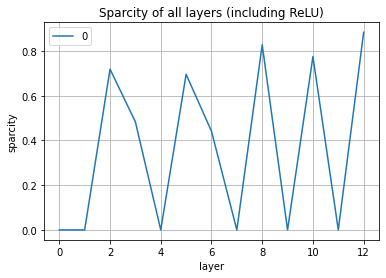

In [73]:
import matplotlib.pyplot as plt
df.plot()
plt.grid()
plt.title("Sparcity of all layers (including ReLU)")
plt.xlabel("layer")
plt.ylabel("sparcity")

In [74]:
conv_data = []
conv_names = []
for i,name in enumerate(layers):
    if("Conv" in name):
        conv_data.append(new_data[i])
        conv_names.append(name)


In [75]:
conv_names

['Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))',
 'Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))',
 'Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))']

Text(0.5, 0, 'Layers')

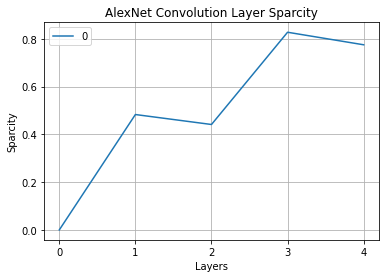

In [76]:
df = pd.DataFrame(conv_data)

df.plot()
plt.locator_params(axis="both", integer=True, tight=True)
plt.grid()
plt.title("AlexNet Convolution Layer Sparcity")
plt.ylabel("Sparcity")
plt.xlabel("Layers")

In [77]:
import os
for file in files:
    file.close()
    os.remove(file.name)

In [78]:

df = pd.DataFrame({"Sparcity":new_data}, index=layers)
df.style.set_caption("Sparcity of Data Entering Every Layer")

,Sparcity
"Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))",0.000000
ReLU(),0.000000
"MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)",0.718774
"Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))",0.483087
ReLU(),0.000000
"MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)",0.695620
"Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))",0.441395
ReLU(),0.000000
"Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))",0.827617
ReLU(),0.000000


In [79]:
df = pd.DataFrame({"Sparcity": conv_data}, index=conv_names)
df.style.set_caption("Sparcity of Data Entering Convolutional Layers")

,Sparcity
"Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))",0.000000
"Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))",0.483087
"Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))",0.441395
"Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))",0.827617
"Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))",0.775102
